In [3]:
! pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 196.9 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('archive/yield_df.csv')
df.drop(['Unnamed: 0'], axis=1 , inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
df.shape

(28242, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [12]:
df['Area'].nunique()

101

In [13]:
df['Item'].nunique()

10

In [15]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [16]:
# The highest and the lowest production rate
df['hg/ha_yield'].agg([np.max , np.min])

C:\Users\91843\AppData\Local\Temp\ipykernel_1304\3894192841.py:2: FutureWarning: The provided callable <function max at 0x0000018D250767A0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['hg/ha_yield'].agg([np.max , np.min])
C:\Users\91843\AppData\Local\Temp\ipykernel_1304\3894192841.py:2: FutureWarning: The provided callable <function min at 0x0000018D250768C0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df['hg/ha_yield'].agg([np.max , np.min])


max    501412
min        50
Name: hg/ha_yield, dtype: int64

In [17]:
# Area with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Area']

2470    Belgium
Name: Area, dtype: object

In [18]:
# Area with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Area']

26174    Tajikistan
Name: Area, dtype: object

In [19]:
# Year with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Year']

2470    2011
Name: Year, dtype: int64

In [20]:
# Year with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Year']

26174    1992
Name: Year, dtype: int64

In [21]:
# Area with highest Temperature
#df[df['avg_temp'] == df['avg_temp'].max()]
df.groupby('Area')['avg_temp'].max().sort_values(ascending = False).head(1)

Area
Sudan    30.65
Name: avg_temp, dtype: float64

In [22]:
# Area with lowest Temperature
#df[df['avg_temp'] == df['avg_temp'].min()]
df.groupby('Area')['avg_temp'].max().sort_values(ascending = True).head(1)

Area
Norway    4.55
Name: avg_temp, dtype: float64

In [23]:
# The most productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Item']

2470    Potatoes
Name: Item, dtype: object

In [24]:
# The least productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ]['Item']

26174    Soybeans
Name: Item, dtype: object

In [25]:
# Area with highest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].max()]
df.groupby('Area')['average_rain_fall_mm_per_year'].max().sort_values(ascending = False).head(1)

Area
Colombia    3240.0
Name: average_rain_fall_mm_per_year, dtype: float64

In [26]:
# Area with lowest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].min()]
df.groupby('Area')['average_rain_fall_mm_per_year'].min().sort_values(ascending = True).head(1)

Area
Egypt    51.0
Name: average_rain_fall_mm_per_year, dtype: float64

In [27]:
df_temp_prod = df[['avg_temp' , 'hg/ha_yield']]
df_temp_prod.corr(method = 'pearson')

,avg_temp,hg/ha_yield
avg_temp,1.000000,-0.114777
hg/ha_yield,-0.114777,1.000000


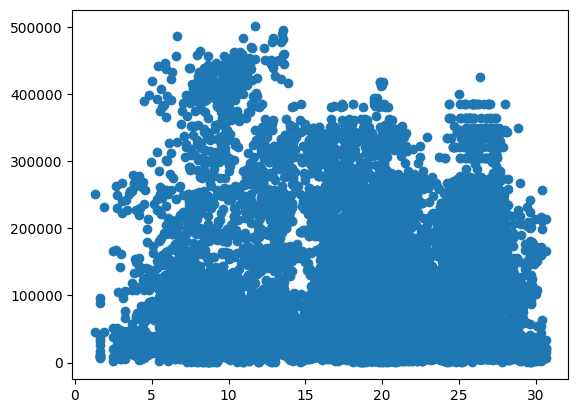

In [28]:
plt.scatter(x= 'avg_temp' , y= 'hg/ha_yield' , data = df)
plt.show()

In [29]:
df_rain_prod = df[['average_rain_fall_mm_per_year' , 'hg/ha_yield']]
df_rain_prod.corr(method = 'pearson')

,average_rain_fall_mm_per_year,hg/ha_yield
average_rain_fall_mm_per_year,1.000000,0.000962
hg/ha_yield,0.000962,1.000000


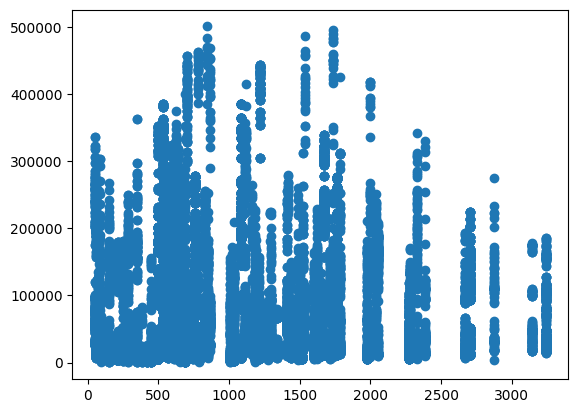

In [30]:
plt.scatter(x = 'average_rain_fall_mm_per_year' , y= 'hg/ha_yield' , data = df)
plt.show()

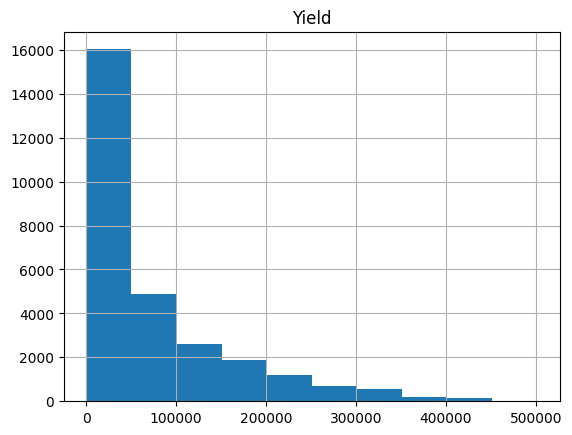

In [44]:
plt.title('Yield')
df['hg/ha_yield'].hist()
plt.show()


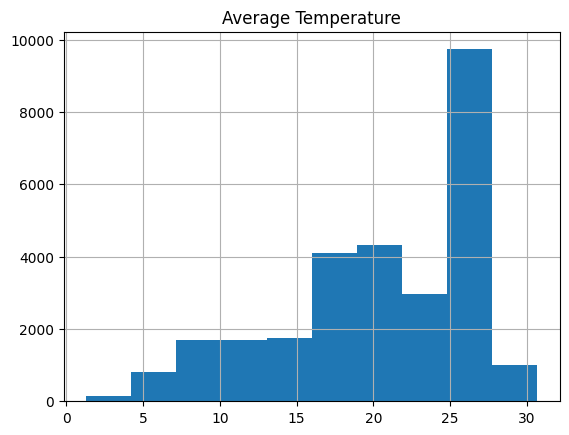

In [43]:
plt.title('Average Temperature')
df['avg_temp'].hist()
plt.show()

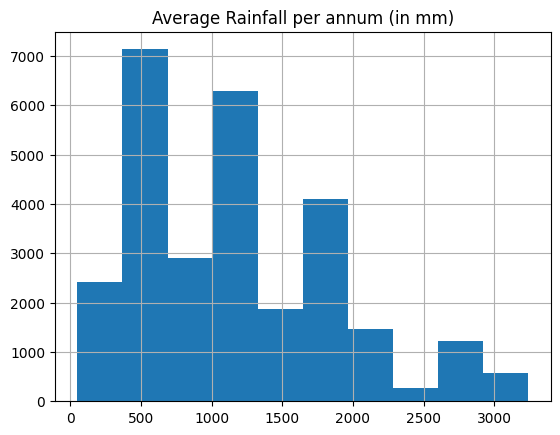

In [42]:
plt.title('Average Rainfall per annum (in mm)')
df['average_rain_fall_mm_per_year'].hist()
plt.show()

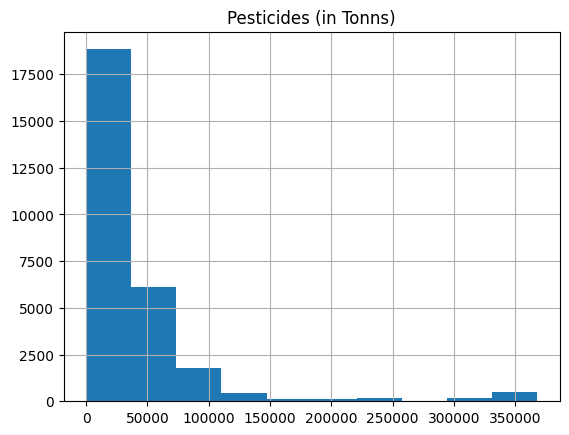

In [41]:
plt.title('Pesticides (in Tonns)')
df['pesticides_tonnes'].hist()
plt.show()

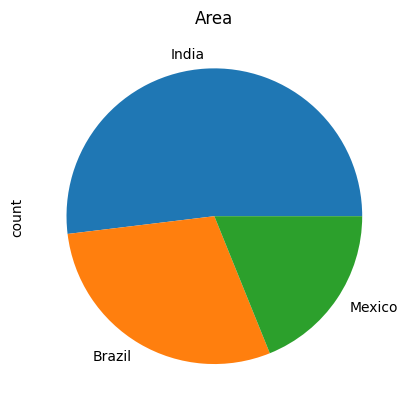

In [39]:
plt.title("Area")
df['Area'].value_counts()[:3].plot(kind='pie')
plt.show()

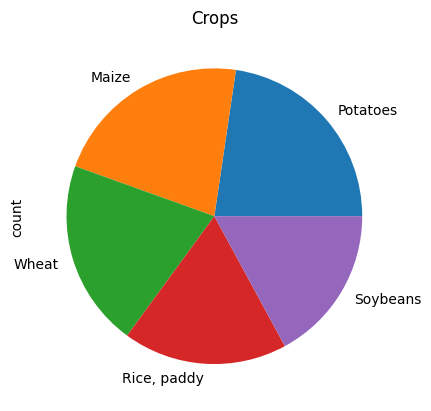

In [38]:
plt.title('Crops')
df['Item'].value_counts()[:5].plot(kind='pie')
plt.show()

In [47]:
sns.heatmap(df.corr())
plt.show()

ValueError: could not convert string to float: 'Albania'

                                        #DATA PREPROCESSING

One Hot Encoding

In [48]:
df_ohe = pd.get_dummies(df, columns=['Area',"Item"])
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,66667,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,23333,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,12500,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,7000,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Standardization

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
df_ohe[cols]= sc.fit_transform(df_ohe[cols])
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,36613,0.473294,-0.616366,-0.661069,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,-1.637075,66667,0.473294,-0.616366,-0.661069,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,-1.637075,23333,0.473294,-0.616366,-0.661069,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,-1.637075,12500,0.473294,-0.616366,-0.661069,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-1.637075,7000,0.473294,-0.616366,-0.661069,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


         #MODEL

In [56]:
from sklearn.model_selection import train_test_split
# Load your data into a DataFrame
# Assuming your data is stored in a variable named 'data'
# Replace 'data' with the actual variable name containing your data
data = pd.read_csv("archive/yield_df.csv")  # Update this with the correct file path

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Area', 'Item'])
# Define features (X) and target variable (y)
X = data.drop('hg/ha_yield', axis=1)  # Assuming 'hg/ha_yield' is your target variable
y = data['hg/ha_yield']
x_train , x_test, y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [57]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.9818882212950834

In [58]:
gbr=GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=0)
gbr.fit(x_train , y_train)
y_pred = gbr.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.965780461235966

In [59]:
rf =RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.8178709010051863